# Problem Statement: Prediction of H1N1 Vaccination

## Import Packages and Read the Data

In [155]:
import csv
import random
import numpy as np
import pandas as pd
import dask.dataframe as dd
import os
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt    
%matplotlib inline
import re
import seaborn as sns
import gc
import time
from math import radians, cos, sin, asin, sqrt
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [156]:
d=pd.read_csv("h1n1_vaccine_prediction.csv")

## Exploratory Data Analysis

In [157]:
d.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0


In [158]:
d.tail(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26697,26697,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26698,26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,1.0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,"MSA, Principle City",3.0,0.0,0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [159]:
d.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
11075,11075,2.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,0
430,430,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,0
5335,5335,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Black,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
23097,23097,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Hispanic,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
23431,23431,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
22110,22110,1.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,1
14625,14625,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,0.0,0
21492,21492,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,White,Male,Below Poverty,Married,Rent,Unemployed,"MSA, Not Principle City",3.0,0.0,0
13102,13102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,2.0,0.0,0
17975,17975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,0


In [160]:
d.shape

(26707, 34)

In [161]:
d.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [162]:
d.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [163]:
d.median()

unique_id                    13353.0
h1n1_worry                       2.0
h1n1_awareness                   1.0
antiviral_medication             0.0
contact_avoidance                1.0
bought_face_mask                 0.0
wash_hands_frequently            1.0
avoid_large_gatherings           0.0
reduced_outside_home_cont        0.0
avoid_touch_face                 1.0
dr_recc_h1n1_vacc                0.0
dr_recc_seasonal_vacc            0.0
chronic_medic_condition          0.0
cont_child_undr_6_mnths          0.0
is_health_worker                 0.0
has_health_insur                 1.0
is_h1n1_vacc_effective           4.0
is_h1n1_risky                    2.0
sick_from_h1n1_vacc              2.0
is_seas_vacc_effective           4.0
is_seas_risky                    2.0
sick_from_seas_vacc              2.0
no_of_adults                     1.0
no_of_children                   0.0
h1n1_vaccine                     0.0
dtype: float64

In [164]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [165]:
d.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [166]:
d.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


array([[<AxesSubplot:title={'center':'unique_id'}>,
        <AxesSubplot:title={'center':'h1n1_worry'}>,
        <AxesSubplot:title={'center':'h1n1_awareness'}>,
        <AxesSubplot:title={'center':'antiviral_medication'}>,
        <AxesSubplot:title={'center':'contact_avoidance'}>],
       [<AxesSubplot:title={'center':'bought_face_mask'}>,
        <AxesSubplot:title={'center':'wash_hands_frequently'}>,
        <AxesSubplot:title={'center':'avoid_large_gatherings'}>,
        <AxesSubplot:title={'center':'reduced_outside_home_cont'}>,
        <AxesSubplot:title={'center':'avoid_touch_face'}>],
       [<AxesSubplot:title={'center':'dr_recc_h1n1_vacc'}>,
        <AxesSubplot:title={'center':'dr_recc_seasonal_vacc'}>,
        <AxesSubplot:title={'center':'chronic_medic_condition'}>,
        <AxesSubplot:title={'center':'cont_child_undr_6_mnths'}>,
        <AxesSubplot:title={'center':'is_health_worker'}>],
       [<AxesSubplot:title={'center':'has_health_insur'}>,
        <AxesSubplot:ti

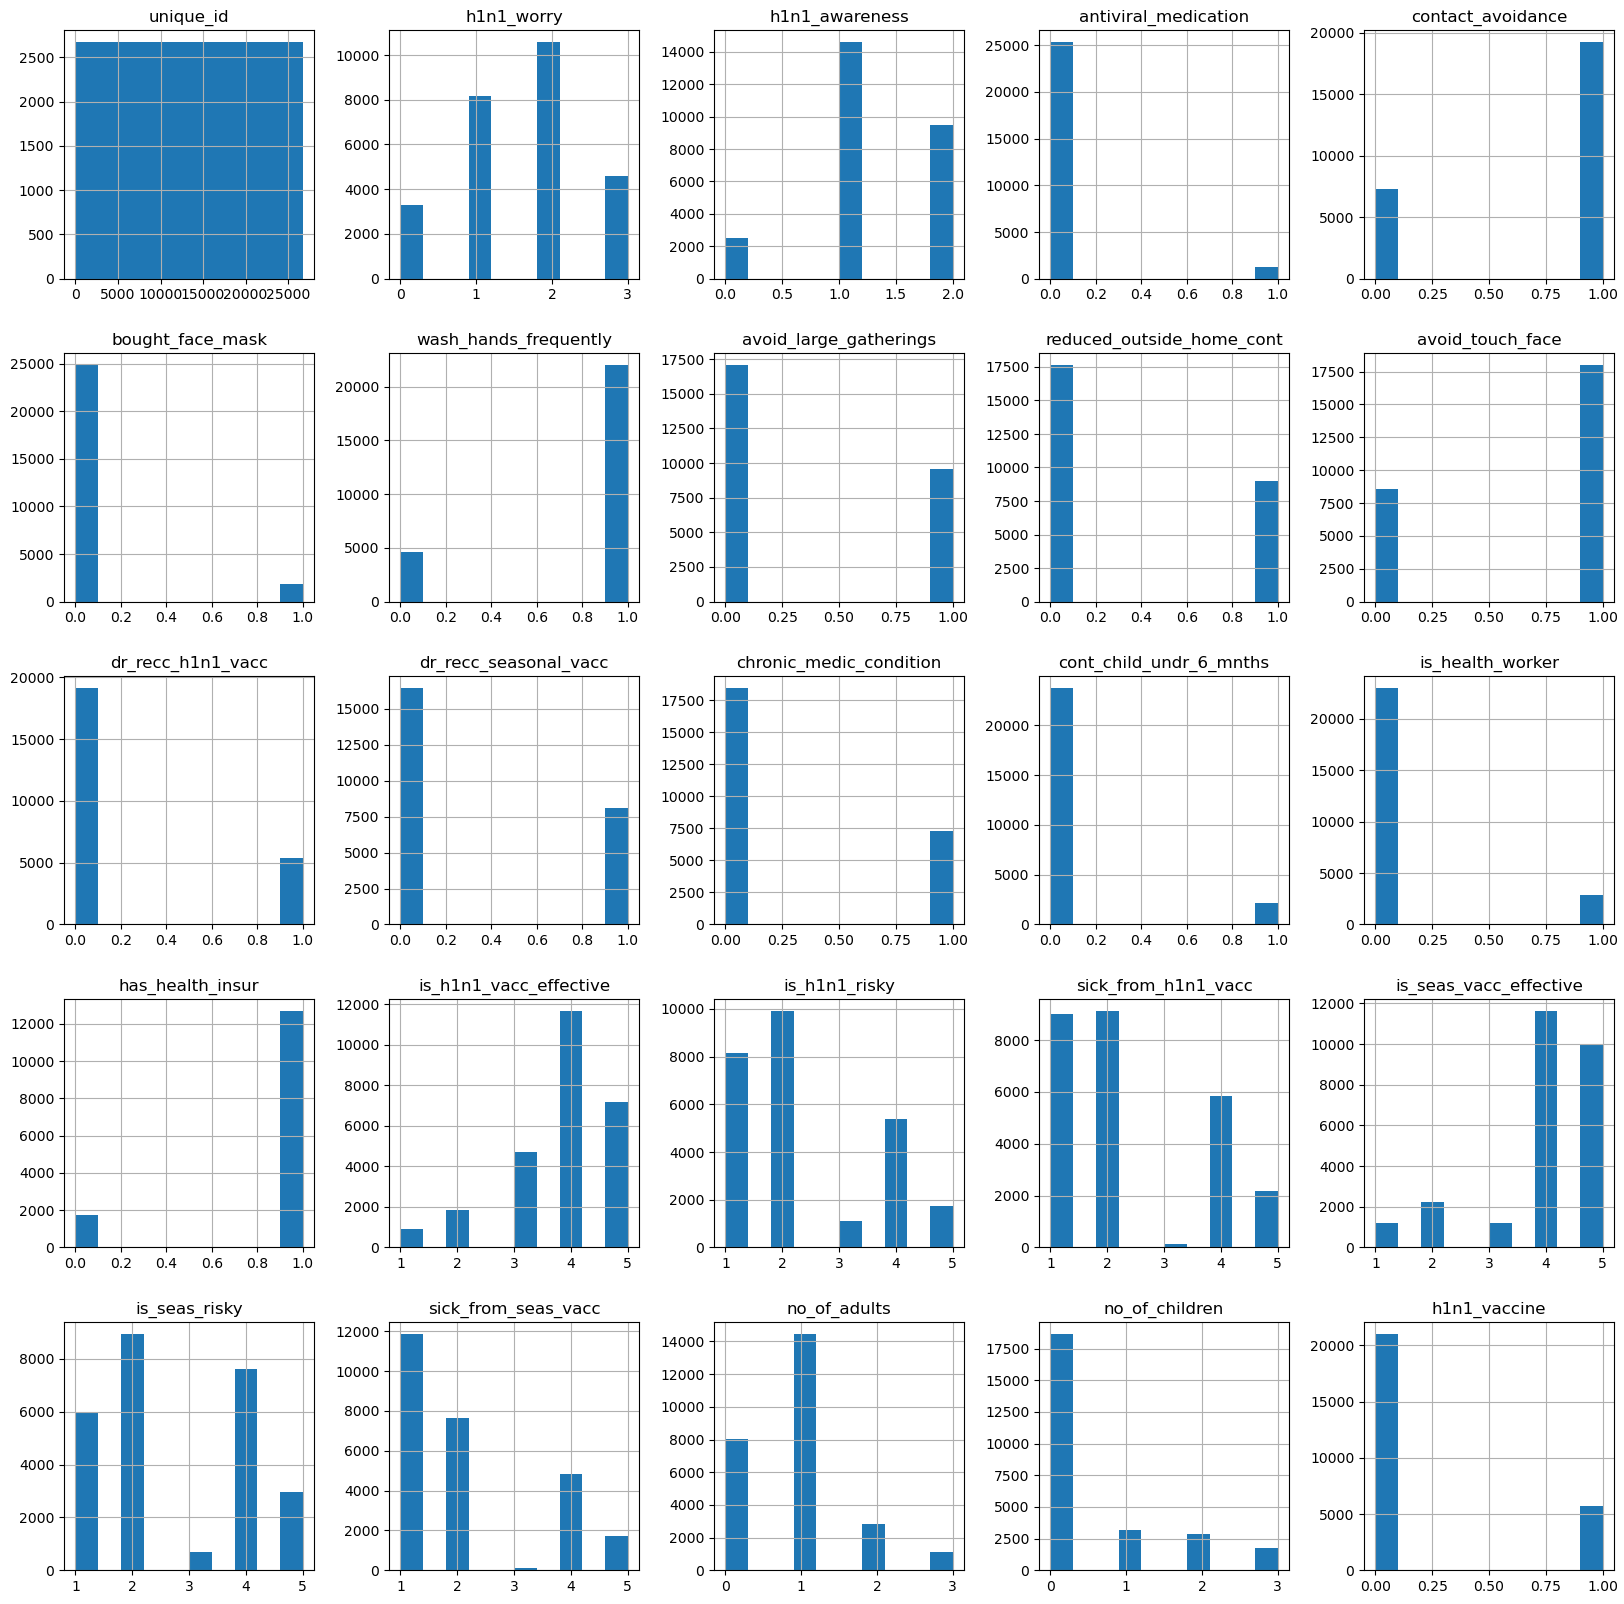

In [167]:
d.hist(figsize=(20,20))

In [168]:
d.dtypes.value_counts()

float64    23
object      9
int64       2
dtype: int64

## Data Cleaning and Pruning

In [169]:
d.drop(['unique_id'], inplace = True, axis = 1)

In [170]:
d.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [171]:
d['h1n1_worry'].unique()

array([ 1.,  3.,  2.,  0., nan])

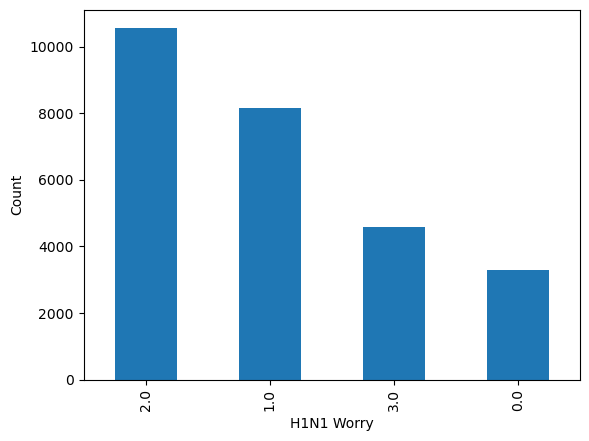

In [172]:
d['h1n1_worry'].value_counts().plot(kind = 'bar')
plt.xlabel('H1N1 Worry')
plt.ylabel('Count')
plt.show()

In [173]:
display(d['h1n1_worry'].mode(), d['h1n1_worry'].median())

0    2.0
Name: h1n1_worry, dtype: float64

2.0

## Dealing with Outliers and Missing Values

In [174]:
d['h1n1_worry'].fillna(d['h1n1_worry'].mode()[0], inplace = True)

In [175]:
d['h1n1_awareness'].unique()

array([ 0.,  2.,  1., nan])

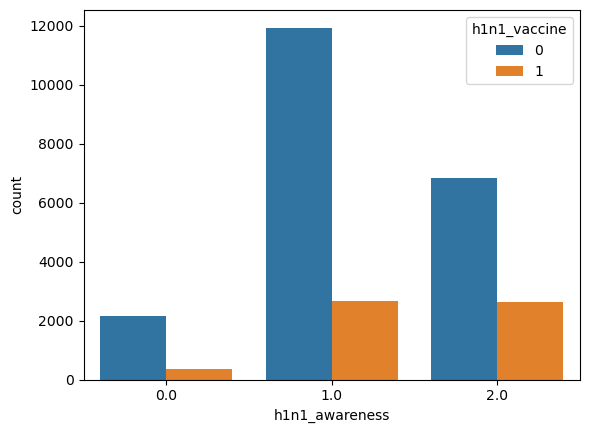

In [176]:
sns.countplot(x = 'h1n1_awareness', data = d, hue = 'h1n1_vaccine')
plt.show()

In [177]:
d['h1n1_awareness'].mode()

0    1.0
Name: h1n1_awareness, dtype: float64

In [178]:
d['h1n1_awareness'].fillna(d['h1n1_awareness'].mode()[0], inplace = True)

In [179]:
d['antiviral_medication'].unique()

array([ 0.,  1., nan])

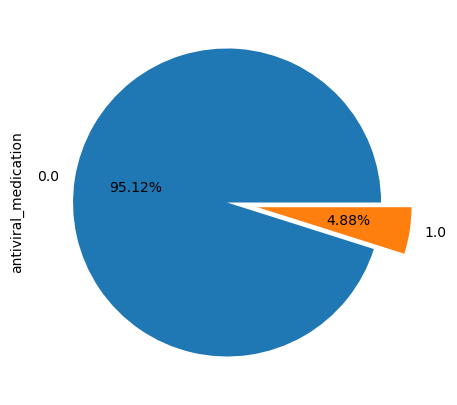

In [180]:
d['antiviral_medication'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5], explode = [0,0.2])
plt.show()

In [181]:
display(d['antiviral_medication'].mode())
d['antiviral_medication'].fillna(d['antiviral_medication'].mode()[0], inplace = True)

0    0.0
Name: antiviral_medication, dtype: float64

In [182]:
d['contact_avoidance'].unique()

array([ 0.,  1., nan])

In [183]:
d['contact_avoidance'].value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

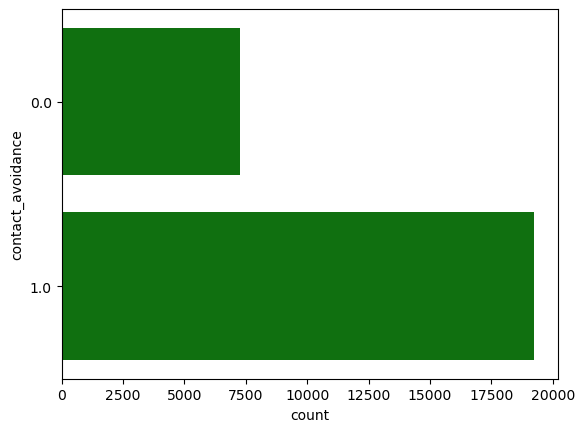

In [184]:
sns.countplot(y = 'contact_avoidance', data = d, color = 'green')
plt.show()

In [185]:
d['contact_avoidance'].fillna(d['contact_avoidance'].mode()[0], inplace = True)

In [186]:
d['bought_face_mask'].unique()

array([ 0.,  1., nan])

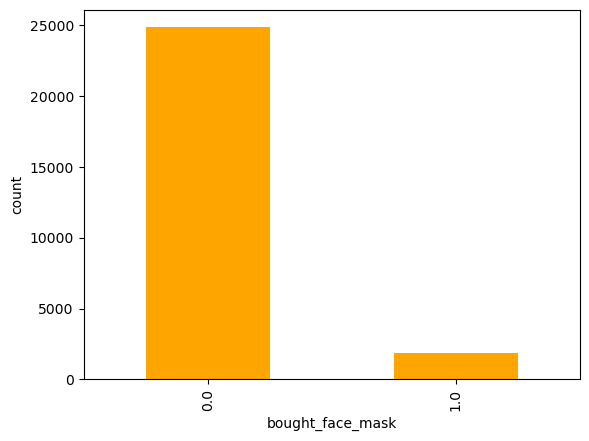

In [187]:
d['bought_face_mask'].value_counts().plot(kind = 'bar', color = 'orange')
plt.xlabel('bought_face_mask')
plt.ylabel('count')
plt.show()

In [188]:
d['bought_face_mask'].fillna(d['bought_face_mask'].mode()[0], inplace = True)

In [189]:
d['wash_hands_frequently'].unique()

array([ 0.,  1., nan])

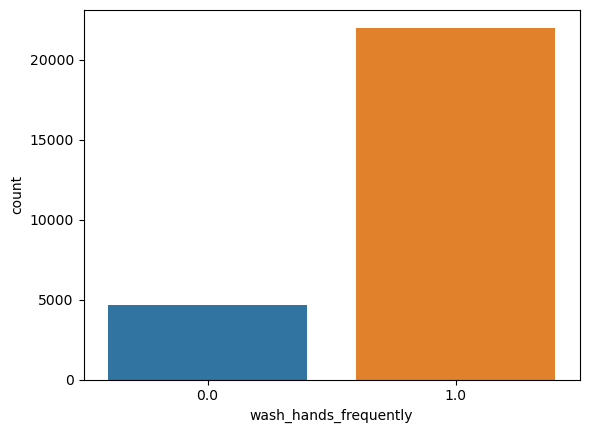

In [190]:
sns.countplot(x = 'wash_hands_frequently', data = d)
plt.show()

In [191]:
d['wash_hands_frequently'].fillna(d['wash_hands_frequently'].mode()[0], inplace = True)

In [192]:
d['avoid_large_gatherings'].unique()

array([ 0.,  1., nan])

In [193]:
d['avoid_large_gatherings'].value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [194]:
d['avoid_large_gatherings'].fillna(d['avoid_large_gatherings'].mode()[0], inplace = True)

In [195]:
d['reduced_outside_home_cont'].unique()

array([ 1.,  0., nan])

In [196]:
d['reduced_outside_home_cont'].value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [197]:
d['reduced_outside_home_cont'].fillna(d['reduced_outside_home_cont'].mode()[0], inplace = True)

In [198]:
d['avoid_touch_face'].unique()

array([ 1.,  0., nan])

In [199]:
d['avoid_touch_face'].value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [200]:
d['avoid_touch_face'].fillna(d['avoid_touch_face'].mode()[0], inplace = True)

In [201]:
display(d['dr_recc_h1n1_vacc'].unique(), d['dr_recc_seasonal_vacc'].unique())

array([ 0., nan,  1.])

array([ 0., nan,  1.])

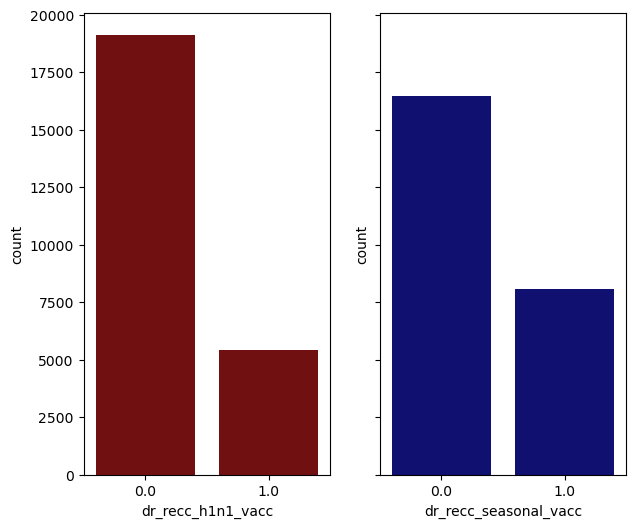

In [202]:
fig, ax = plt.subplots(1,2, figsize = [7,6], sharey = True )
sns.countplot(x = 'dr_recc_h1n1_vacc', data = d, color = 'maroon', ax=ax[0])
sns.countplot(x = 'dr_recc_seasonal_vacc', data = d, color = 'navy', ax=ax[1])
plt.show()

In [203]:
d['dr_recc_h1n1_vacc'].fillna(d['dr_recc_h1n1_vacc'].mode()[0], inplace = True)
d['dr_recc_seasonal_vacc'].fillna(d['dr_recc_seasonal_vacc'].mode()[0], inplace = True)

In [204]:
d['chronic_medic_condition'].value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [205]:
d['chronic_medic_condition'].fillna(d['chronic_medic_condition'].mode()[0], inplace = True)

<AxesSubplot:>

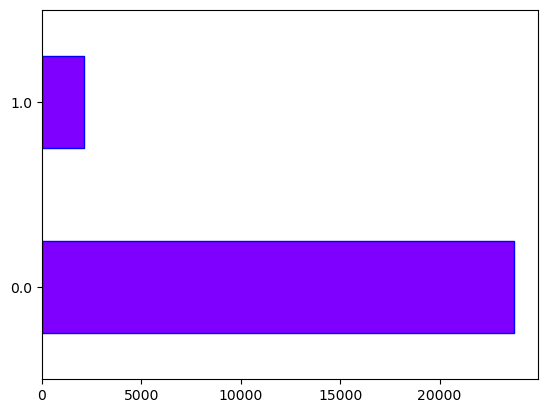

In [206]:
d['cont_child_undr_6_mnths'].value_counts().plot(kind = 'barh', cmap = 'rainbow', edgecolor = 'b')

In [207]:
d['cont_child_undr_6_mnths'].fillna(d['cont_child_undr_6_mnths'].mode()[0], inplace = True)

In [208]:
d['is_health_worker'].value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [209]:
d['is_health_worker'].fillna(d['is_health_worker'].mode()[0], inplace = True)

In [210]:
d['has_health_insur'].unique()

array([ 1., nan,  0.])

<AxesSubplot:>

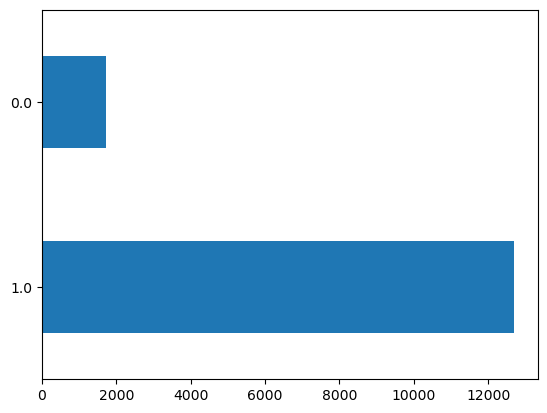

In [211]:
d['has_health_insur'].value_counts().plot(kind = 'barh')

In [212]:
d['has_health_insur'].fillna(2.0, inplace = True)

<AxesSubplot:>

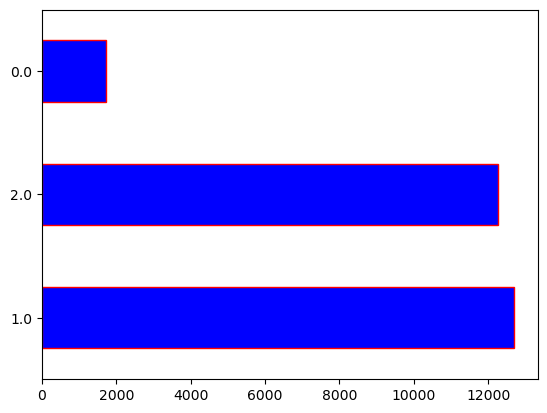

In [213]:
d['has_health_insur'].value_counts().plot(kind = 'barh', color = 'b', edgecolor = 'r')

In [214]:
display(d['is_h1n1_vacc_effective'].unique(), d['is_seas_vacc_effective'].unique())

array([ 3.,  5.,  4.,  2.,  1., nan])

array([ 2.,  4.,  5.,  3.,  1., nan])

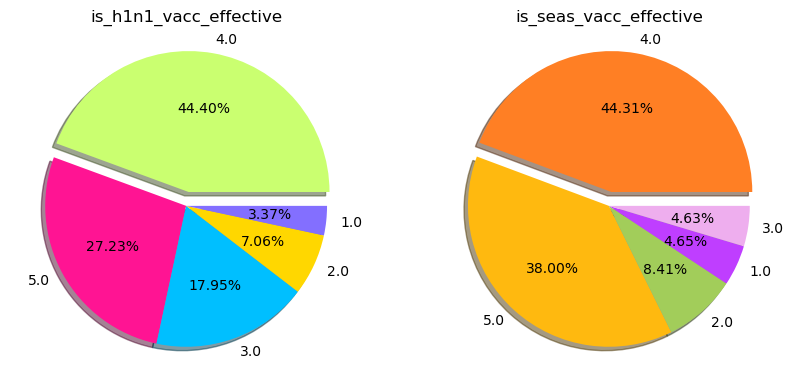

In [215]:
colors = ['#CAFF70', '#FF1493', '#00BFFF', '#FFD700', '#836FFF']
colors1 = ['#FF7F24', '#FFB90F', '#A2CD5A', '#BF3EFF', '#EEAEEE']
fig, (ax1,ax2) = plt.subplots(1,2, figsize = [10,10])

ax1.pie(d['is_h1n1_vacc_effective'].value_counts(), labels = d['is_h1n1_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors, shadow = True)

ax2.pie(d['is_seas_vacc_effective'].value_counts(), labels = d['is_seas_vacc_effective'].value_counts().index , 
        autopct = '%0.2f%%', explode= [0.1,0,0,0,0], colors = colors1, shadow = True)

ax1.set_title('is_h1n1_vacc_effective')
ax2.set_title('is_seas_vacc_effective')

plt.show()

In [216]:
d['is_h1n1_vacc_effective'].fillna(d['is_h1n1_vacc_effective'].mode()[0], inplace = True)
d['is_seas_vacc_effective'].fillna(d['is_seas_vacc_effective'].mode()[0], inplace = True)

In [217]:
display(d['is_h1n1_risky'].unique(), d['is_seas_risky'].unique())

array([ 1.,  4.,  3.,  2.,  5., nan])

array([ 1.,  2.,  4.,  3.,  5., nan])

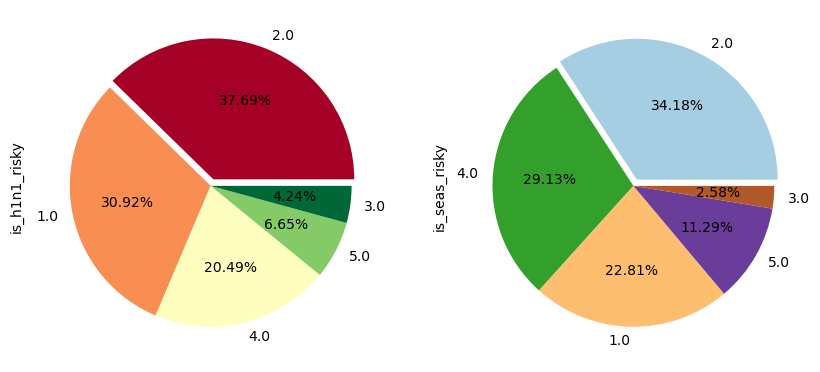

In [218]:
fig, ax = plt.subplots(1, 2, figsize = [10,10])
d['is_h1n1_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'RdYlGn', ax = ax[0])
d['is_seas_risky'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Paired', ax = ax[1])
plt.show()

In [219]:
d['is_h1n1_risky'].fillna(d['is_h1n1_risky'].mode()[0], inplace = True)
d['is_seas_risky'].fillna(d['is_seas_risky'].mode()[0], inplace = True)

In [220]:
display(d['sick_from_h1n1_vacc'].unique(), d['sick_from_seas_vacc'].unique())

array([ 2.,  4.,  1.,  5.,  3., nan])

array([ 2.,  4.,  1.,  5., nan,  3.])

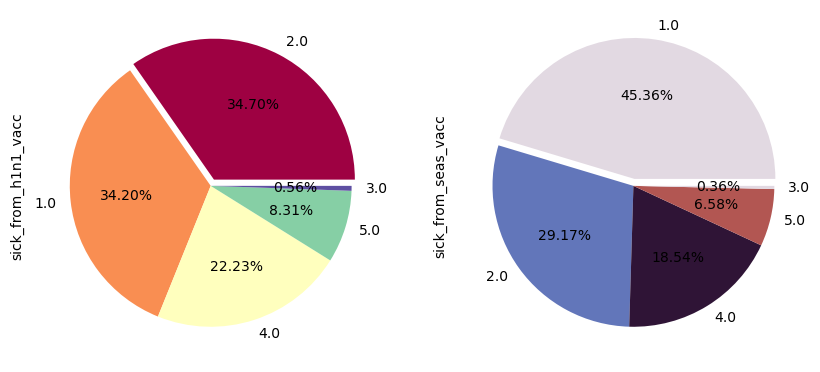

In [221]:
fig, ax = plt.subplots(1,2, figsize = [10,10])
d['sick_from_h1n1_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'Spectral', ax = ax[0])
d['sick_from_seas_vacc'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', explode = [0.05,0,0,0,0], cmap = 'twilight', ax = ax[1])
plt.show()

In [222]:
d['sick_from_h1n1_vacc'].fillna(d['sick_from_h1n1_vacc'].mode()[0], inplace = True)
d['sick_from_seas_vacc'].fillna(d['sick_from_seas_vacc'].mode()[0], inplace = True)

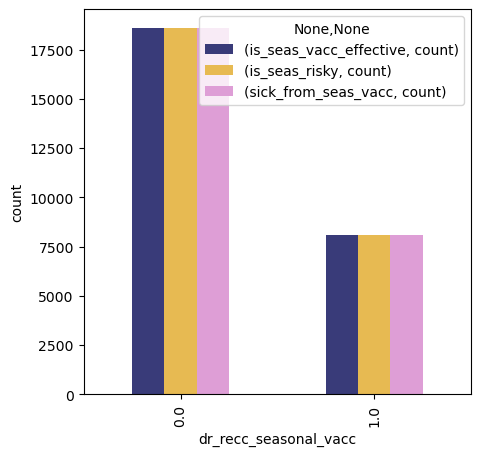

In [223]:
d.groupby(['dr_recc_seasonal_vacc']).agg({'is_seas_vacc_effective' : ['count'],
                                      'is_seas_risky' :['count'],
                                      'sick_from_seas_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20b', figsize = [5,5])
plt.ylabel('count')
plt.show()

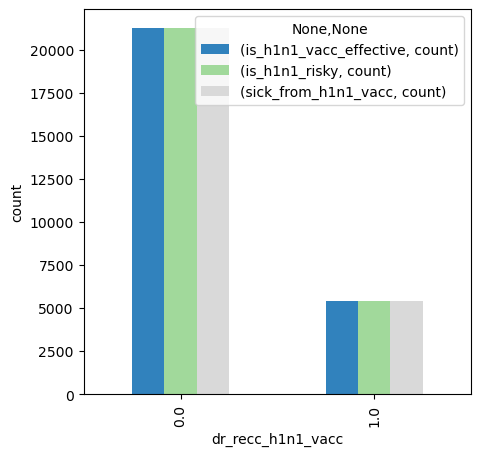

In [224]:
d.groupby(['dr_recc_h1n1_vacc']).agg({'is_h1n1_vacc_effective' : ['count'],
                                      'is_h1n1_risky' :['count'],
                                      'sick_from_h1n1_vacc' : ['count']}).plot(kind = 'bar', cmap = 'tab20c', figsize = [5,5])
plt.ylabel('count')
plt.show()

In [225]:
d['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [226]:
d['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [227]:
d['qualification'].fillna(d['qualification'].mode()[0], inplace = True)

<AxesSubplot:>

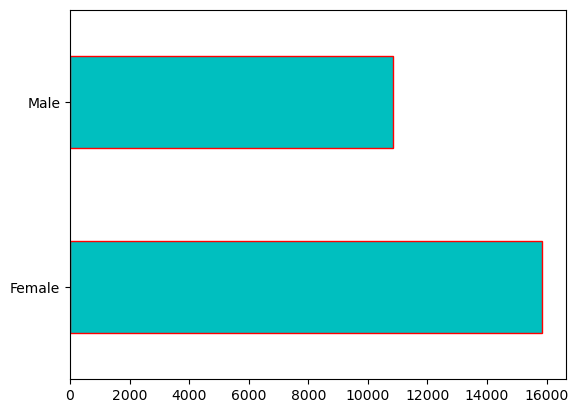

In [228]:
d['sex'].value_counts().plot(kind = 'barh', color = 'c', edgecolor = 'r')

In [229]:
d['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000', nan],
      dtype=object)

<AxesSubplot:ylabel='income_level'>

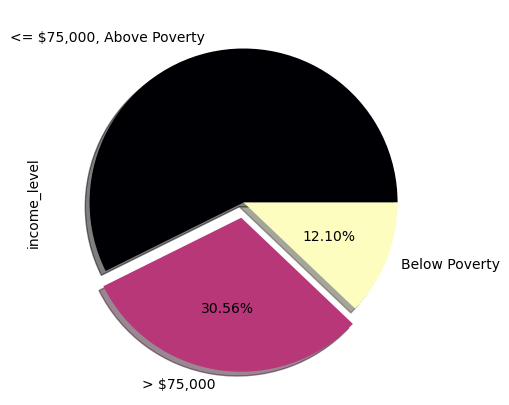

In [230]:
d['income_level'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', cmap = 'magma',
                                            explode = [0,0.1,0], figsize = [5,5], shadow = True)

In [231]:
d['income_level'].fillna('Unknown', inplace = True)

In [232]:
d['marital_status'].unique()

array(['Not Married', 'Married', nan], dtype=object)

In [233]:
d['marital_status'].value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [234]:
d['marital_status'].fillna(d['marital_status'].mode()[0], inplace = True)

In [235]:
d['housing_status'].unique()

array(['Own', 'Rent', nan], dtype=object)

<AxesSubplot:>

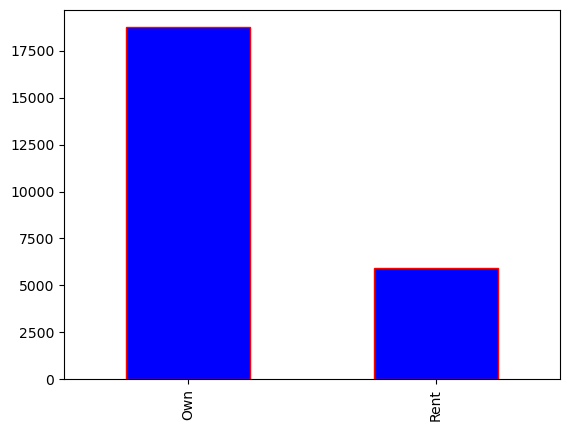

In [236]:
d['housing_status'].value_counts().plot(kind = 'bar', color = 'b', edgecolor = 'r')

In [237]:
d['housing_status'].fillna(d['housing_status'].mode()[0], inplace = True)

In [238]:
d['employment'].unique()

array(['Not in Labor Force', 'Employed', 'Unemployed', nan], dtype=object)

<AxesSubplot:ylabel='employment'>

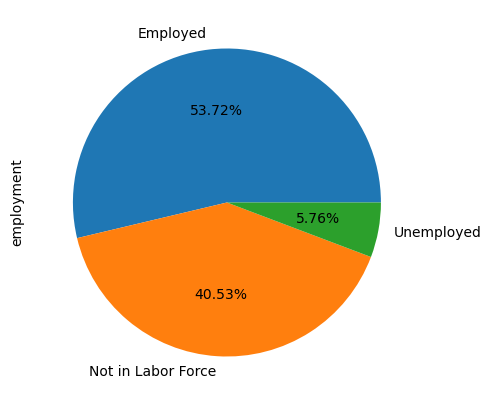

In [239]:
d['employment'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', figsize = [5,5])

In [240]:
d['employment'].fillna(d['employment'].mode()[0], inplace = True)

In [241]:
display(d['no_of_adults'].unique(), d['no_of_children'].unique())

array([ 0.,  2.,  1.,  3., nan])

array([ 0.,  3.,  2.,  1., nan])

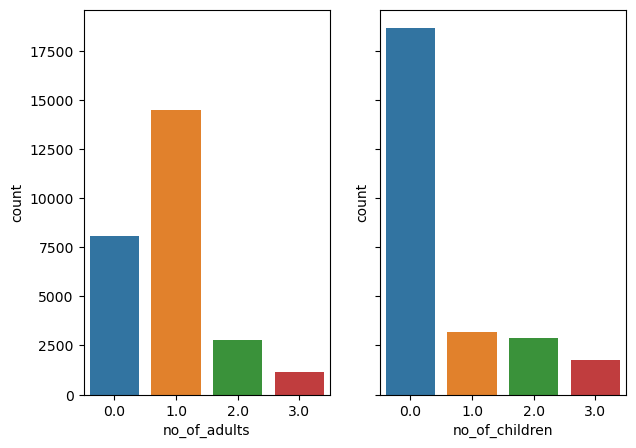

In [242]:
fig, ax = plt.subplots(1,2, figsize = [7,5], sharey = True)
sns.countplot( x = 'no_of_adults', data = d, ax = ax[0])
sns.countplot( x = 'no_of_children', data = d, ax = ax[1])
plt.show()

In [243]:
d['no_of_adults'].fillna(d['no_of_adults'].mode()[0], inplace = True)
d['no_of_children'].fillna(d['no_of_children'].mode()[0], inplace = True)

In [244]:
d['age_bracket'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

In [245]:
d.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

## Extracting Input and Output

In [246]:
d1 = d.astype({'h1n1_worry' : str, 'h1n1_awareness': str, 'antiviral_medication': str,
       'contact_avoidance': str, 'bought_face_mask': str, 'wash_hands_frequently': str,
       'avoid_large_gatherings': str, 'reduced_outside_home_cont': str,
       'avoid_touch_face': str, 'dr_recc_h1n1_vacc': str, 'dr_recc_seasonal_vacc': str,
       'chronic_medic_condition': str, 'cont_child_undr_6_mnths': str,
       'is_health_worker': str, 'has_health_insur': str, 'is_h1n1_vacc_effective': str,
       'is_h1n1_risky': str, 'sick_from_h1n1_vacc': str, 'is_seas_vacc_effective': str, 'age_bracket' : str,
       'is_seas_risky': str, 'sick_from_seas_vacc': str, 'no_of_adults' : str, 'no_of_children' : str,
        'h1n1_vaccine' : str})
d1.dtypes.value_counts()

object    33
dtype: int64

In [247]:
d_dummy = pd.get_dummies(d1, drop_first= True )

In [248]:
d_dummy.shape

(26707, 70)

In [249]:
d_dummy['h1n1_vaccine_1'].value_counts(normalize = True)

0    0.787546
1    0.212454
Name: h1n1_vaccine_1, dtype: float64

In [250]:
y=d_dummy['h1n1_vaccine_1']
x=d_dummy.drop(['h1n1_vaccine_1'], axis=1)

## Splitting the Values into Train and Test Values

In [251]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [252]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
28,sick_from_h1n1_vacc_3.0,1.094738
40,sick_from_seas_vacc_3.0,1.087666
22,is_h1n1_vacc_effective_5.0,0.379078
32,is_seas_vacc_effective_3.0,0.376005
36,is_seas_risky_3.0,0.351710
...,...,...
4,h1n1_awareness_2.0,0.008856
25,is_h1n1_risky_4.0,0.008779
62,census_msa_Non-MSA,0.006878
10,reduced_outside_home_cont_1.0,0.005734


In [253]:
x_train, x_test, y_train , y_test=train_test_split(x,y, test_size=.25, random_state=88)

## Logistic Regression Modelling

In [254]:
log = LogisticRegression()

log.fit(x_train,y_train)

print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.8558162755866201
Testing Score : 0.8442414257900255


## Gradient Boosting Classifier

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

In [256]:
model1=GradientBoostingClassifier(criterion='friedman_mse',random_state=50,max_features=6,)

In [257]:
model1.fit(x_train, y_train)

GradientBoostingClassifier(max_features=6, random_state=50)

In [258]:
model1.score(x_train, y_train)

0.854118821767349

In [259]:
model1.fit(x_test, y_test)

GradientBoostingClassifier(max_features=6, random_state=50)

In [260]:
model1.score(x_test, y_test)

0.8500823723228995

## Bagging Classifier

In [261]:
from sklearn.ensemble import BaggingClassifier

In [262]:
model2=BaggingClassifier()

In [263]:
model2.fit(x_train,y_train)

BaggingClassifier()

In [264]:
model2.score(x_train,y_train)

0.9871692461308038

In [265]:
model2.fit(x_test,y_test)

BaggingClassifier()

In [266]:
model2.score(x_test,y_test)

0.9848734461584544

## Random Forest Classifier

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
model3 = RandomForestClassifier()

In [269]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [270]:
model3.score(x_train,y_train)

1.0

In [271]:
model3.fit(x_test,y_test)

RandomForestClassifier()

In [272]:
model3.score(x_test,y_test)

0.9998502321401828

## K Nearest Neighbor Classifier

In [273]:
from sklearn.neighbors import KNeighborsClassifier

In [274]:
model4 = KNeighborsClassifier()

In [275]:
model4.fit(x_train,y_train)

KNeighborsClassifier()

In [276]:
model4.score(x_train,y_train)

0.8727408886669995

In [277]:
model4.fit(x_test,y_test)

KNeighborsClassifier()

In [278]:
model4.score(x_test,y_test)

0.8638610154260895

## Vaccination Predictions

In [279]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [280]:
cnfTrain=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTrain

,Pred_0,Pred_1
Act_0,15031,773
Act_1,2115,2111


In [281]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     15804
           1       0.73      0.50      0.59      4226

    accuracy                           0.86     20030
   macro avg       0.80      0.73      0.75     20030
weighted avg       0.85      0.86      0.85     20030



In [282]:
cnfTest=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfTest

,Pred_0,Pred_1
Act_0,4985,244
Act_1,796,652


In [283]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      5229
           1       0.73      0.45      0.56      1448

    accuracy                           0.84      6677
   macro avg       0.79      0.70      0.73      6677
weighted avg       0.83      0.84      0.83      6677



In [284]:
pd.DataFrame(log.predict_proba(x_train), columns=["Prob_0", "Prob_1"])

,Prob_0,Prob_1
0,0.945305,0.054695
1,0.965775,0.034225
2,0.404756,0.595244
3,0.988857,0.011143
4,0.799952,0.200048
...,...,...
20025,0.963749,0.036251
20026,0.935796,0.064204
20027,0.735832,0.264168
20028,0.775515,0.224485


In [285]:
x_train1=x_train.copy()

x_train1["Actual_Default"]=y_train
x_train1["Prob_Default"]=log.predict_proba(x_train)[:, 1]

x_train1

,h1n1_worry_1.0,h1n1_worry_2.0,h1n1_worry_3.0,h1n1_awareness_1.0,h1n1_awareness_2.0,antiviral_medication_1.0,contact_avoidance_1.0,bought_face_mask_1.0,wash_hands_frequently_1.0,avoid_large_gatherings_1.0,...,"census_msa_MSA, Principle City",census_msa_Non-MSA,no_of_adults_1.0,no_of_adults_2.0,no_of_adults_3.0,no_of_children_1.0,no_of_children_2.0,no_of_children_3.0,Actual_Default,Prob_Default
9353,1,0,0,1,0,0,1,0,1,1,...,0,0,1,0,0,0,0,0,0,0.054695
6317,0,1,0,1,0,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,0.034225
13542,0,1,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0.595244
23986,0,1,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0.011143
16025,1,0,0,0,1,1,1,0,1,1,...,1,0,1,0,0,0,0,0,1,0.200048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24938,0,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0.036251
2481,0,0,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0.064204
4047,0,0,1,1,0,0,1,0,1,1,...,0,1,1,0,0,0,1,0,0,0.264168
6432,1,0,0,1,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0.224485


## Analysis on the Predicted and Actual Values

In [286]:
def profile_decile(X,y,trained_model):
    X_1=X.copy()
    y_1=y.copy()
    y_pred1=trained_model.predict(X_1)
    X_1["Prob_Event"]=trained_model.predict_proba(X_1)[:,1]
    X_1["Y_actual"]=y_1
    X_1["Y_pred"]=y_pred1
    X_1["Rank"]=pd.qcut(X_1["Prob_Event"], 10, labels=np.arange(0,10,1))
    X_1["numb"]=10
    X_1["Decile"]=X_1["numb"]-X_1["Rank"].astype("int")
    
    profile=pd.DataFrame(X_1.groupby("Decile") \
                        .apply(lambda x: pd.Series({
        'min_score'   : x["Prob_Event"].min(),
        'max_score'   : x["Prob_Event"].max(),
        'Event'       : x["Y_actual"].sum(),
        'Non_event'   : x["Y_actual"].count()-x["Y_actual"].sum(),
        'Total'       : x["Y_actual"].count() })))
    return profile

In [287]:
newtrain_pred=np.where(log.predict_proba(x_train)[:,1] > 0.232280104, 1, 0)

In [288]:
cnfNewTrain=pd.DataFrame(metrics.confusion_matrix(y_train , newtrain_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTrain

,Pred_0,Pred_1
Act_0,12966,2838
Act_1,1056,3170


In [289]:
print(metrics.classification_report(y_train , newtrain_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     15804
           1       0.53      0.75      0.62      4226

    accuracy                           0.81     20030
   macro avg       0.73      0.79      0.74     20030
weighted avg       0.84      0.81      0.82     20030



In [290]:
newtest_pred=np.where(log.predict_proba(x_test)[:,1] > 0.229209326, 1, 0)

In [291]:
cnfNewTest=pd.DataFrame(metrics.confusion_matrix(y_test , newtest_pred), columns=["Pred_0", "Pred_1"],
                index=["Act_0", "Act_1"])
cnfNewTest

,Pred_0,Pred_1
Act_0,4272,957
Act_1,402,1046


In [292]:
print(metrics.classification_report(y_test , newtest_pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5229
           1       0.52      0.72      0.61      1448

    accuracy                           0.80      6677
   macro avg       0.72      0.77      0.73      6677
weighted avg       0.83      0.80      0.81      6677



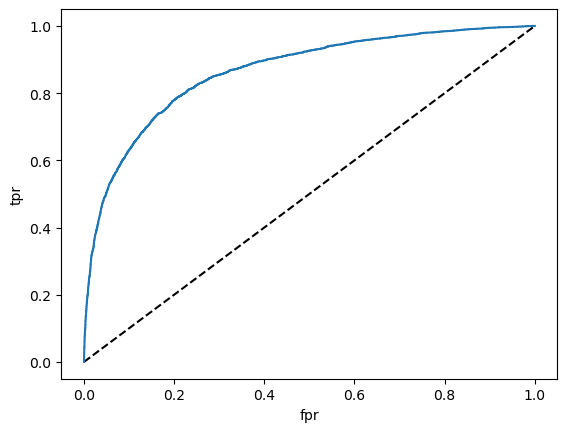

In [293]:
probs=log.predict_proba(x_train)[:,1]

fpr, tpr, threshold=metrics.roc_curve(y_train,probs )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='logistic')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [294]:
metrics.roc_auc_score(y_train,probs)

0.8646604470787018

In [295]:
model_report = pd.DataFrame()

tmp = pd.Series({'Model': " Logical Regression ",
                 'ROC Score' : metrics.roc_auc_score(y_test, newtest_pred),
                 'Precision Score': metrics.precision_score(y_test, newtest_pred),
                 'Recall Score': metrics.recall_score(y_test, newtest_pred),
                 'F1 Score' : metrics.f1_score(y_test, newtest_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, newtest_pred)})

model_logR_report = model_report.append(tmp, ignore_index = True)
model_logR_report

,Model,ROC Score,Precision Score,Recall Score,F1 Score,Accuracy Score
0,Logical Regression,0.769679,0.522217,0.722376,0.606201,0.796465
